   ID bug_type           species
0   1    [Bee]  [Apis mellifera]
1   2    [Bee]  [Apis mellifera]
2   3    [Bee]  [Apis mellifera]
3   4    [Bee]  [Apis mellifera]
4   5    [Bee]  [Apis mellifera]


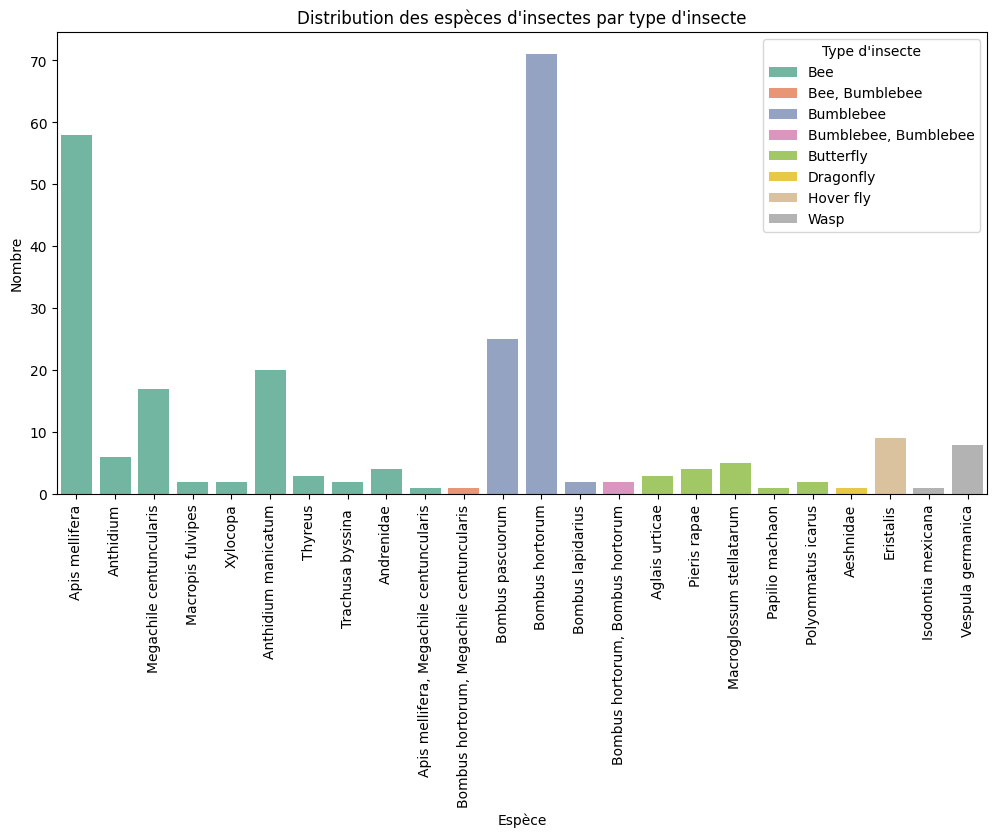

In [1]:
#Sophie TEST 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

img_dir = 'train'
mask_dir = 'train/masks'
excel_file = 'train/classif.xlsx'
data_feature_file = 'data_features.csv'


def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None

# Load features
def load_features(data_feature_file):
    if os.path.exists(data_feature_file):
        return pd.read_csv(data_feature_file)
    else:
        print(f"Feature file {data_feature_file} not found.")
        return None

classif_df = load_classification(excel_file)
features_df = load_features(data_feature_file)
# 处理标签
def process_labels(df):
    bug_types = []
    species = []
    
    for _, row in df.iterrows():
        bugs = row['bug_type']
        species_info = row['species']
        
        # 处理x2
        if ' x2' in species_info:
            bugs = [bugs.replace(' x2','')] * 2
            species_info = [species_info.replace(' x2','')] * 2
            
        else:
            bugs = bugs.split(' & ')
            species_info = species_info.split(' & ')
            
            
        # 处理问号
        bugs = [bug.replace(' ?', '') for bug in bugs]
        species_info = [specie.replace(' ?', '') for specie in species_info]
        
        bug_types.append(bugs)
        species.append(species_info)
    
    df['bug_type'] = bug_types
    df['species'] = species
    return df

classif_df = process_labels(classif_df)
print(classif_df.head())

# 转换列为字符串以便于绘图
classif_df['bug_type_str'] = classif_df['bug_type'].apply(lambda x: ', '.join(x))
classif_df['species_str'] = classif_df['species'].apply(lambda x: ', '.join(x))

# Tri du DataFrame par type d'insecte
classif_df_sorted = classif_df.sort_values(by='bug_type_str')

# Utilisation de seaborn pour créer une visualisation de la distribution des espèces
plt.figure(figsize=(12, 6))
sns.countplot(data=classif_df_sorted, x='species_str', hue='bug_type_str', palette='Set2')

# Ajout des titres et des labels
plt.title('Distribution des espèces d\'insectes par type d\'insecte')
plt.xlabel('Espèce')
plt.ylabel('Nombre')
plt.xticks(rotation=90)
plt.legend(title='Type d\'insecte')

# Affichage du graphique
plt.show()

   ID bug_type           species
0   1    [Bee]  [Apis mellifera]
1   2    [Bee]  [Apis mellifera]
2   3    [Bee]  [Apis mellifera]
3   4    [Bee]  [Apis mellifera]
4   5    [Bee]  [Apis mellifera]


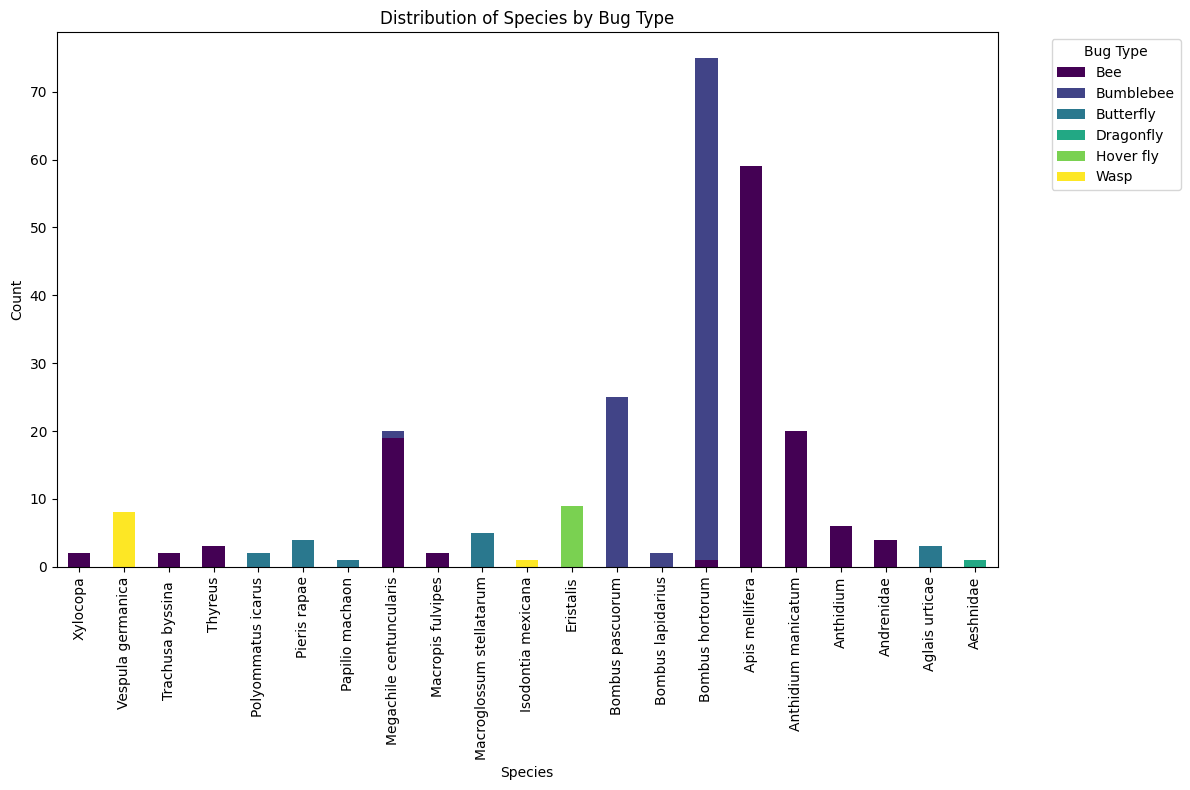

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

img_dir = 'train'
mask_dir = 'train/masks'
excel_file = 'train/classif.xlsx'
data_feature_file = 'data_features.csv'

# Load classification file
def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None

# Load features
def load_features(data_feature_file):
    if os.path.exists(data_feature_file):
        return pd.read_csv(data_feature_file)
    else:
        print(f"Feature file {data_feature_file} not found.")
        return None

classif_df = load_classification(excel_file)
features_df = load_features(data_feature_file)

# 处理标签
def process_labels(df):
    bug_types = []
    species = []
    
    for _, row in df.iterrows():
        bugs = row['bug_type']
        species_info = row['species']
        
        # 处理x2
        if ' x2' in species_info:
            bugs = [bugs.replace(' x2','')] * 2
            species_info = [species_info.replace(' x2','')] * 2
        else:
            bugs = bugs.split(' & ')
            species_info = species_info.split(' & ')
        
        # 处理问号
        bugs = [bug.replace(' ?', '') for bug in bugs]
        species_info = [specie.replace(' ?', '') for specie in species_info]
        
        bug_types.append(bugs)
        species.append(species_info)
    
    df['bug_type'] = bug_types
    df['species'] = species
    return df

classif_df = process_labels(classif_df)
print(classif_df.head())

# 使用MultiLabelBinarizer转换标签
mlb_bug_type = MultiLabelBinarizer()
mlb_species = MultiLabelBinarizer()

bug_type_encoded = mlb_bug_type.fit_transform(classif_df['bug_type'])
species_encoded = mlb_species.fit_transform(classif_df['species'])

# 转换为DataFrame
bug_type_df = pd.DataFrame(bug_type_encoded, columns=mlb_bug_type.classes_)
species_df = pd.DataFrame(species_encoded, columns=mlb_species.classes_)

# 合并所有数据
all_data_df = pd.concat([classif_df.drop(columns=['bug_type', 'species']), bug_type_df, species_df, features_df], axis=1)
#print(all_data_df)

# Plot distribution of species sorted by bug type with each color representing a bug type
def plot_species_distribution_combined(bug_type_df, species_df):
    combined_df = pd.concat([bug_type_df, species_df], axis=1)
    bug_types = bug_type_df.columns
    species = species_df.columns
    
    species_distribution = pd.DataFrame(0, index=species, columns=bug_types)
    
    for bug_type in bug_types:
        species_distribution[bug_type] = combined_df[combined_df[bug_type] == 1][species].sum()
    
    species_distribution = species_distribution.sort_index(ascending=False)

    species_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
    plt.title('Distribution of Species by Bug Type')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Bug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the combined distribution
plot_species_distribution_combined(bug_type_df, species_df)


   ID bug_type           species
0   1    [Bee]  [Apis mellifera]
1   2    [Bee]  [Apis mellifera]
2   3    [Bee]  [Apis mellifera]
3   4    [Bee]  [Apis mellifera]
4   5    [Bee]  [Apis mellifera]


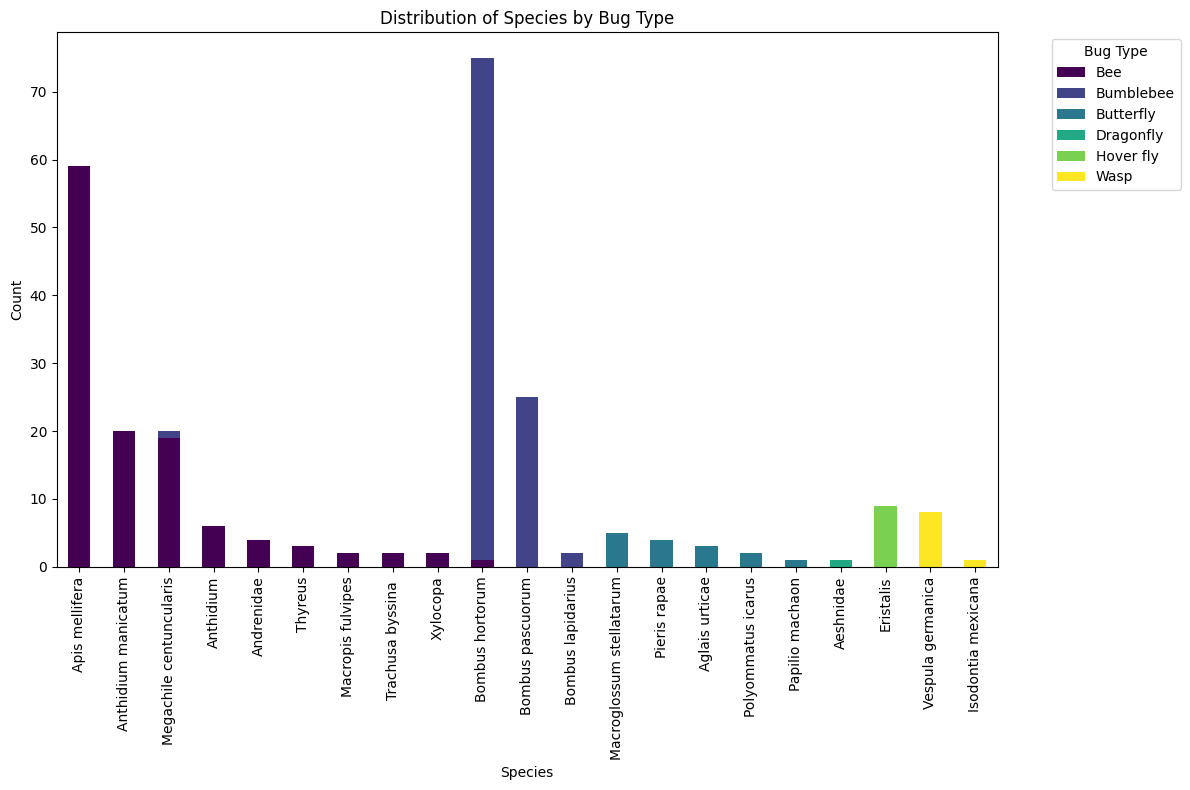

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

img_dir = 'train'
mask_dir = 'train/masks'
excel_file = 'train/classif.xlsx'
data_feature_file = 'data_features.csv'

# Load classification file
def load_classification(excel_file):
    if os.path.exists(excel_file):
        return pd.read_excel(excel_file)
    else:
        print(f"Excel file {excel_file} not found.")
        return None

# Load features
def load_features(data_feature_file):
    if os.path.exists(data_feature_file):
        return pd.read_csv(data_feature_file)
    else:
        print(f"Feature file {data_feature_file} not found.")
        return None

classif_df = load_classification(excel_file)
features_df = load_features(data_feature_file)

# 处理标签
def process_labels(df):
    bug_types = []
    species = []
    
    for _, row in df.iterrows():
        bugs = row['bug_type']
        species_info = row['species']
        
        # 处理x2
        if ' x2' in species_info:
            bugs = [bugs.replace(' x2','')] * 2
            species_info = [species_info.replace(' x2','')] * 2
        else:
            bugs = bugs.split(' & ')
            species_info = species_info.split(' & ')
        
        # 处理问号
        bugs = [bug.replace(' ?', '') for bug in bugs]
        species_info = [specie.replace(' ?', '') for specie in species_info]
        
        bug_types.append(bugs)
        species.append(species_info)
    
    df['bug_type'] = bug_types
    df['species'] = species
    return df

classif_df = process_labels(classif_df)
print(classif_df.head())

# 使用MultiLabelBinarizer转换标签
mlb_bug_type = MultiLabelBinarizer()
mlb_species = MultiLabelBinarizer()

bug_type_encoded = mlb_bug_type.fit_transform(classif_df['bug_type'])
species_encoded = mlb_species.fit_transform(classif_df['species'])

# 转换为DataFrame
bug_type_df = pd.DataFrame(bug_type_encoded, columns=mlb_bug_type.classes_)
species_df = pd.DataFrame(species_encoded, columns=mlb_species.classes_)

# 合并所有数据
all_data_df = pd.concat([classif_df.drop(columns=['bug_type', 'species']), bug_type_df, species_df, features_df], axis=1)
#print(all_data_df)

# Plot distribution of species sorted by bug type with each color representing a bug type
def plot_species_distribution_combined_sorted(bug_type_df, species_df):
    combined_df = pd.concat([bug_type_df, species_df], axis=1)
    bug_types = bug_type_df.columns
    species = species_df.columns
    
    species_distribution = pd.DataFrame(0, index=species, columns=bug_types)
    
    for bug_type in bug_types:
        species_distribution[bug_type] = combined_df[combined_df[bug_type] == 1][species].sum()
    
    species_distribution = species_distribution.sort_values(by=bug_types.tolist(), ascending=False)

    species_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
    plt.title('Distribution of Species by Bug Type')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Bug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function to plot the combined distribution
plot_species_distribution_combined_sorted(bug_type_df, species_df)
